In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
scores = [
    [1],
    [1],
    [2],
    [2],
    [3],
    [3],
    [3],
    [4],
    [4],
    [5],
    [6],
    [6],
    [7],
    [7],
    [8],
    [8],
    [8],
    [9],
    [9],
    [10],
]
passed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Text(0, 0.5, 'passed')

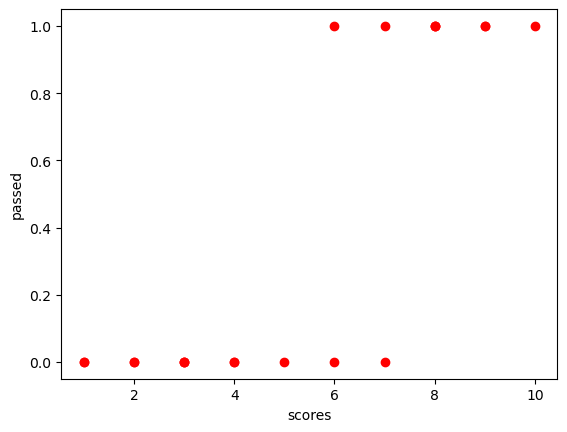

In [3]:
plt.scatter(scores, passed, color="r")
plt.xlabel("scores")
plt.ylabel("passed")

In [4]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

def loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

def gradient(X, h, y):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient

In [7]:
import os
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'

'pwd' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [11]:
import pandas as pd

df = pd.read_csv(
    "./course-8-data.csv",    
    header=0,
)  # 加载数据集
df.head()

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [14]:
df.shape

(150, 3)

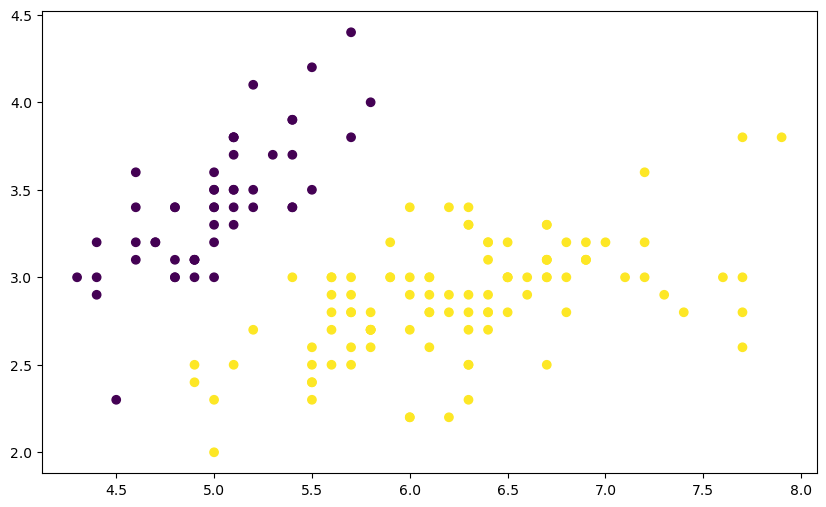

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

In [30]:
def logisitic_regression(x, y, lr, epochs):
    x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    # w = np.random.normal(size=(x.shape[1], 1), scale=0.01, loc=0)
    w = np.zeros((x.shape[1], 1))
    for epoch in range(epochs):
        z = np.dot(x, w)
        h = sigmoid(z)
        g = gradient(x, h, y)
        w -= lr * g
        if epoch % 1000 == 0:
            print(f"loss: {loss(h, y)}")
    return w


In [40]:
x = df[['X0', 'X1']].values
y = df[['Y']].values
lr = 0.01
num_iter = 100000
w = logisitic_regression(x, y, lr, num_iter)
w

loss: 0.6931471805599454
loss: 0.31911154769563904
loss: 0.22073835871166347
loss: 0.17368819234466001
loss: 0.1460646931183036
loss: 0.1277988088750664
loss: 0.11476155444951104
loss: 0.10495017208221298
loss: 0.09727458788716971
loss: 0.09108966949310685
loss: 0.08598855919893711
loss: 0.08170154863108108
loss: 0.07804251821872148
loss: 0.07487871585794079
loss: 0.07211279883313414
loss: 0.06967169246003621
loss: 0.06749942086992534
loss: 0.06555234706273079
loss: 0.06379592560100465
loss: 0.062202433960675735
loss: 0.060749353983176574
loss: 0.05941819538092124
loss: 0.05819362615389587
loss: 0.05706282010944841
loss: 0.0560149605685555
loss: 0.05504085816614155
loss: 0.05413265316659593
loss: 0.05328358118730418
loss: 0.052487787054792796
loss: 0.05174017559452542
loss: 0.05103629104528569
loss: 0.05037221886467175
loss: 0.04974450520105848
loss: 0.04915009041660387
loss: 0.0485862538698793
loss: 0.04805056778484513
loss: 0.047540858500860046
loss: 0.04705517375574267
loss: 0.04659

array([[ 5.89110545],
       [-9.26467909],
       [-3.04124482]])

In [38]:
def prob(x, w):
    x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    return sigmoid(np.dot(x, w))

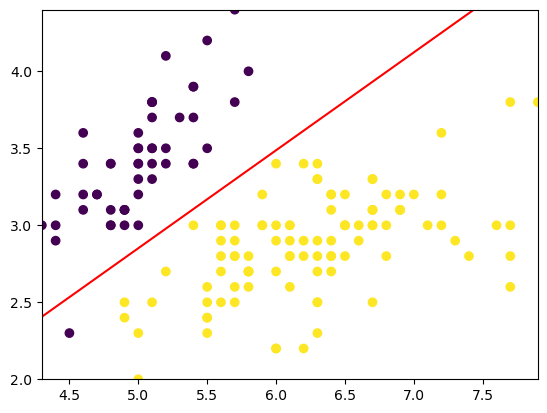

In [41]:
plt.scatter(df["X0"], df["X1"], c=df["Y"])
x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df['X1'].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = prob(grid, w).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='r')

简洁实现

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(tol=1e-3, max_iter=10000)
model.fit(df[['X0', 'X1']], df['Y'])

w = model.coef_[0]
w

array([ 3.40541982, -3.15987559])

c:\Users\xsxsh\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


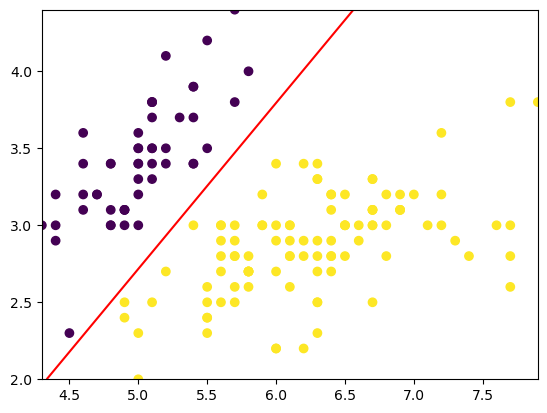

In [49]:
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df['X1'].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx1.shape) 
# 用我的prob
# probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='r')
